In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
alldata = pd.read_csv("../data/hour.csv")

In [3]:
alldata.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
alldata.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
alldata.shape

(17379, 17)

In [7]:
alldata.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

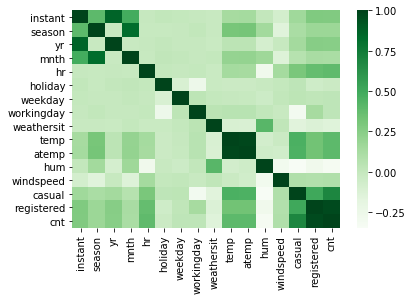

In [16]:
sns.heatmap(alldata.corr(),cmap="Greens")

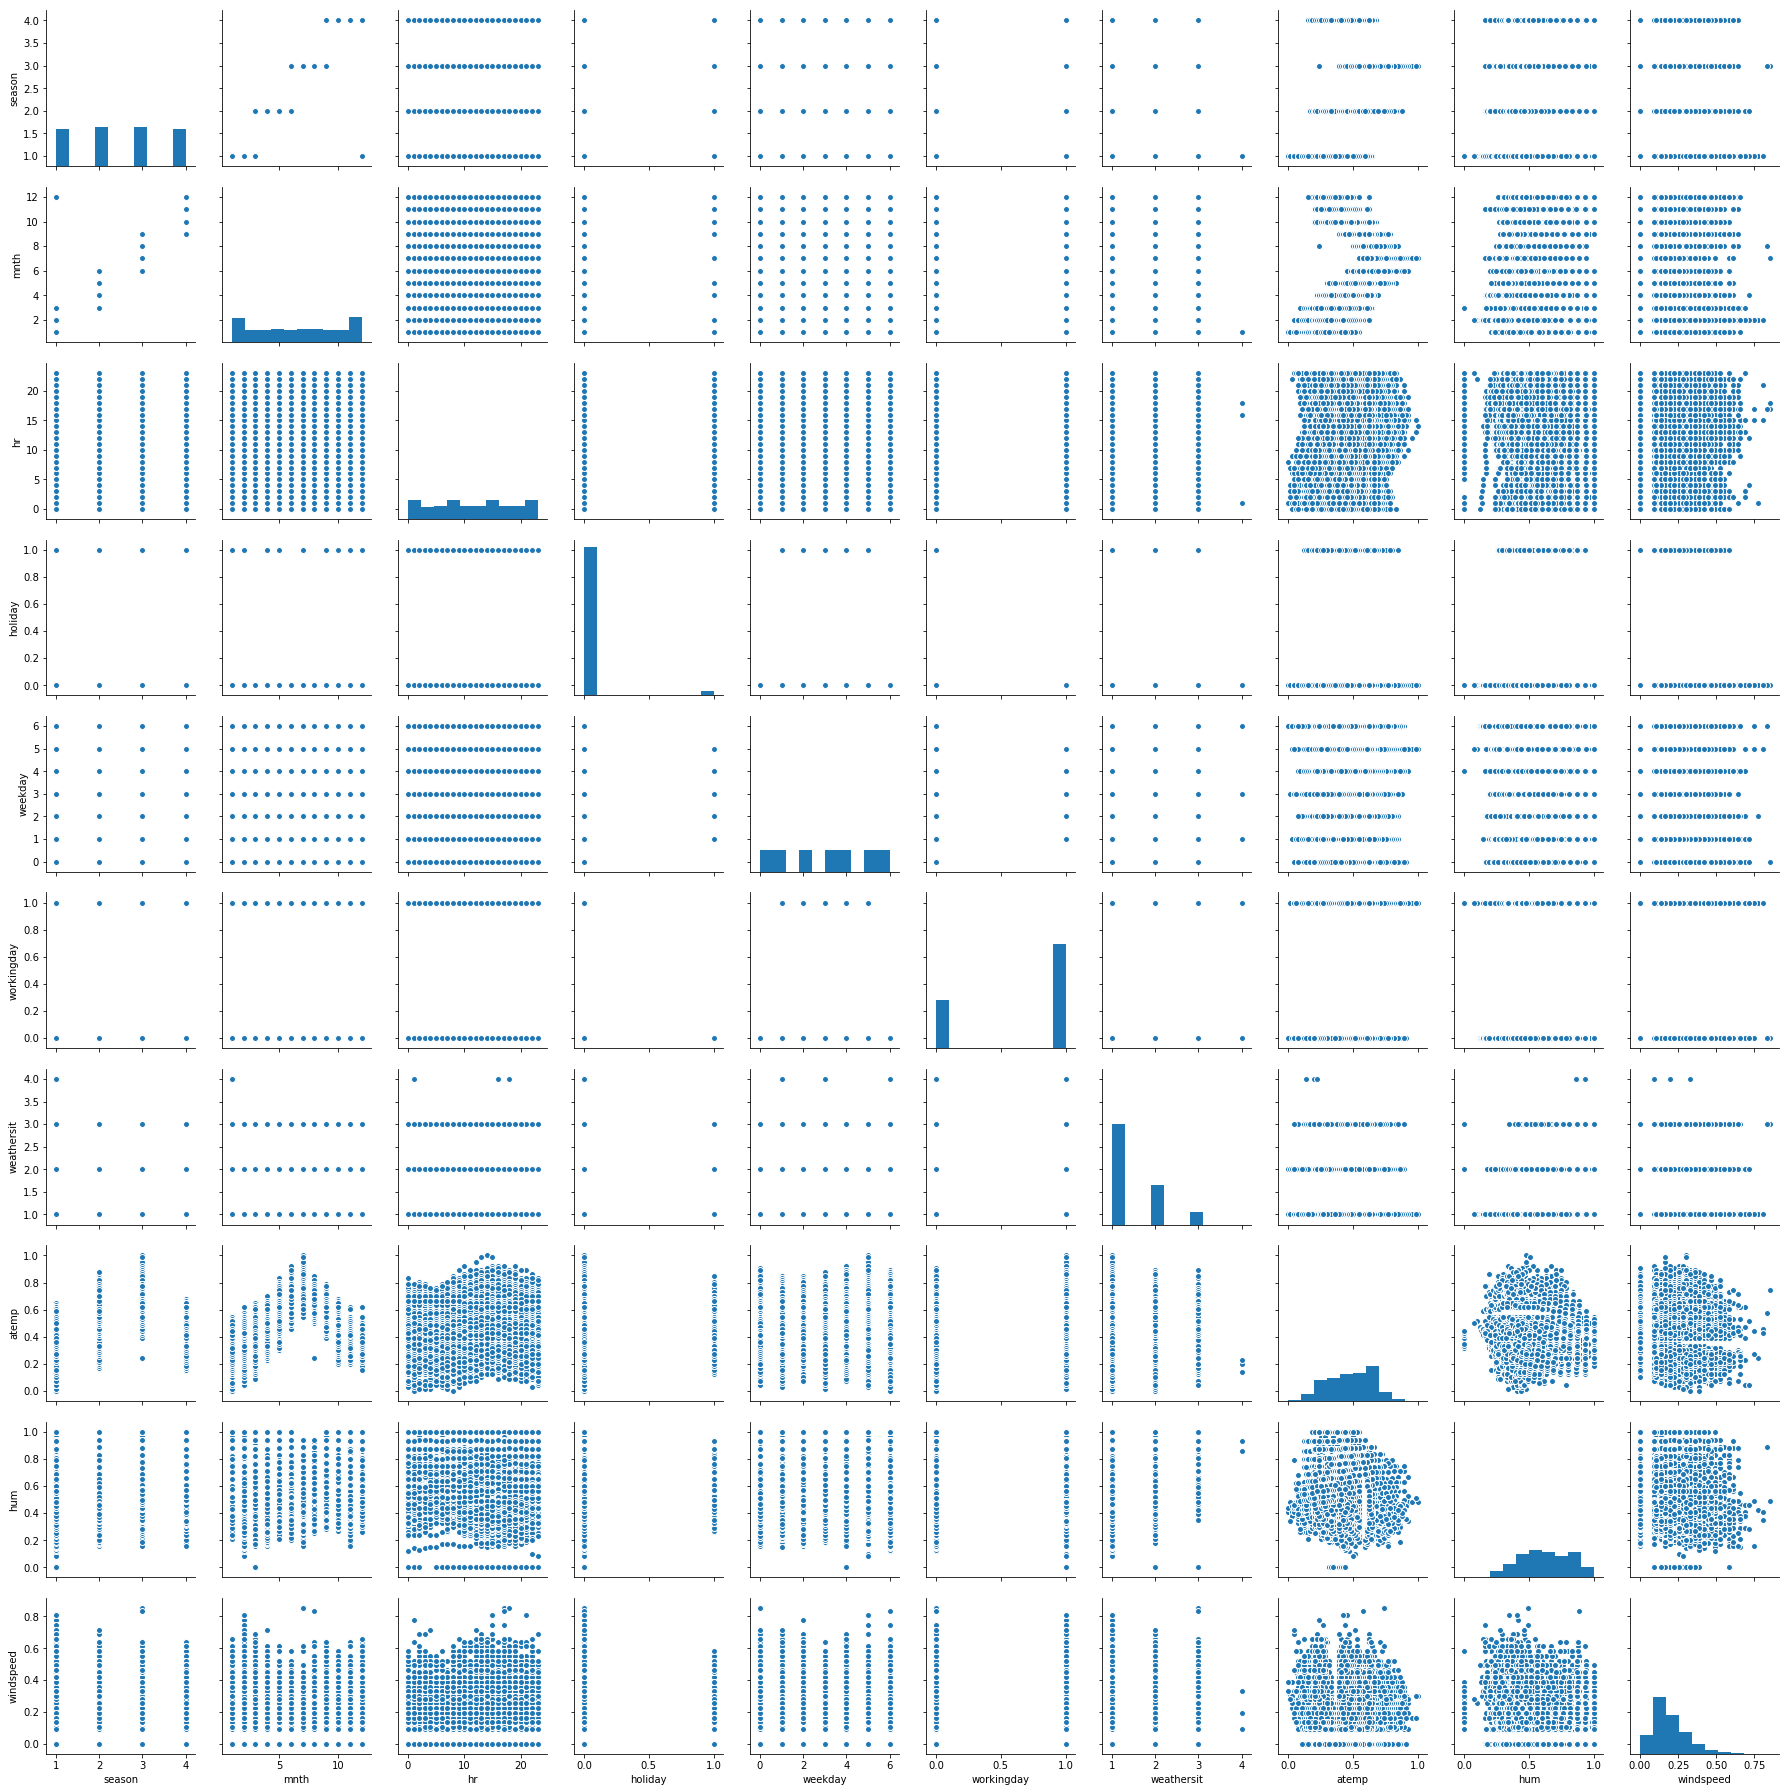

In [42]:
sns.pairplot(alldata[['season','mnth','hr','holiday','weekday','workingday','weathersit','atemp','hum','windspeed','cnt']])

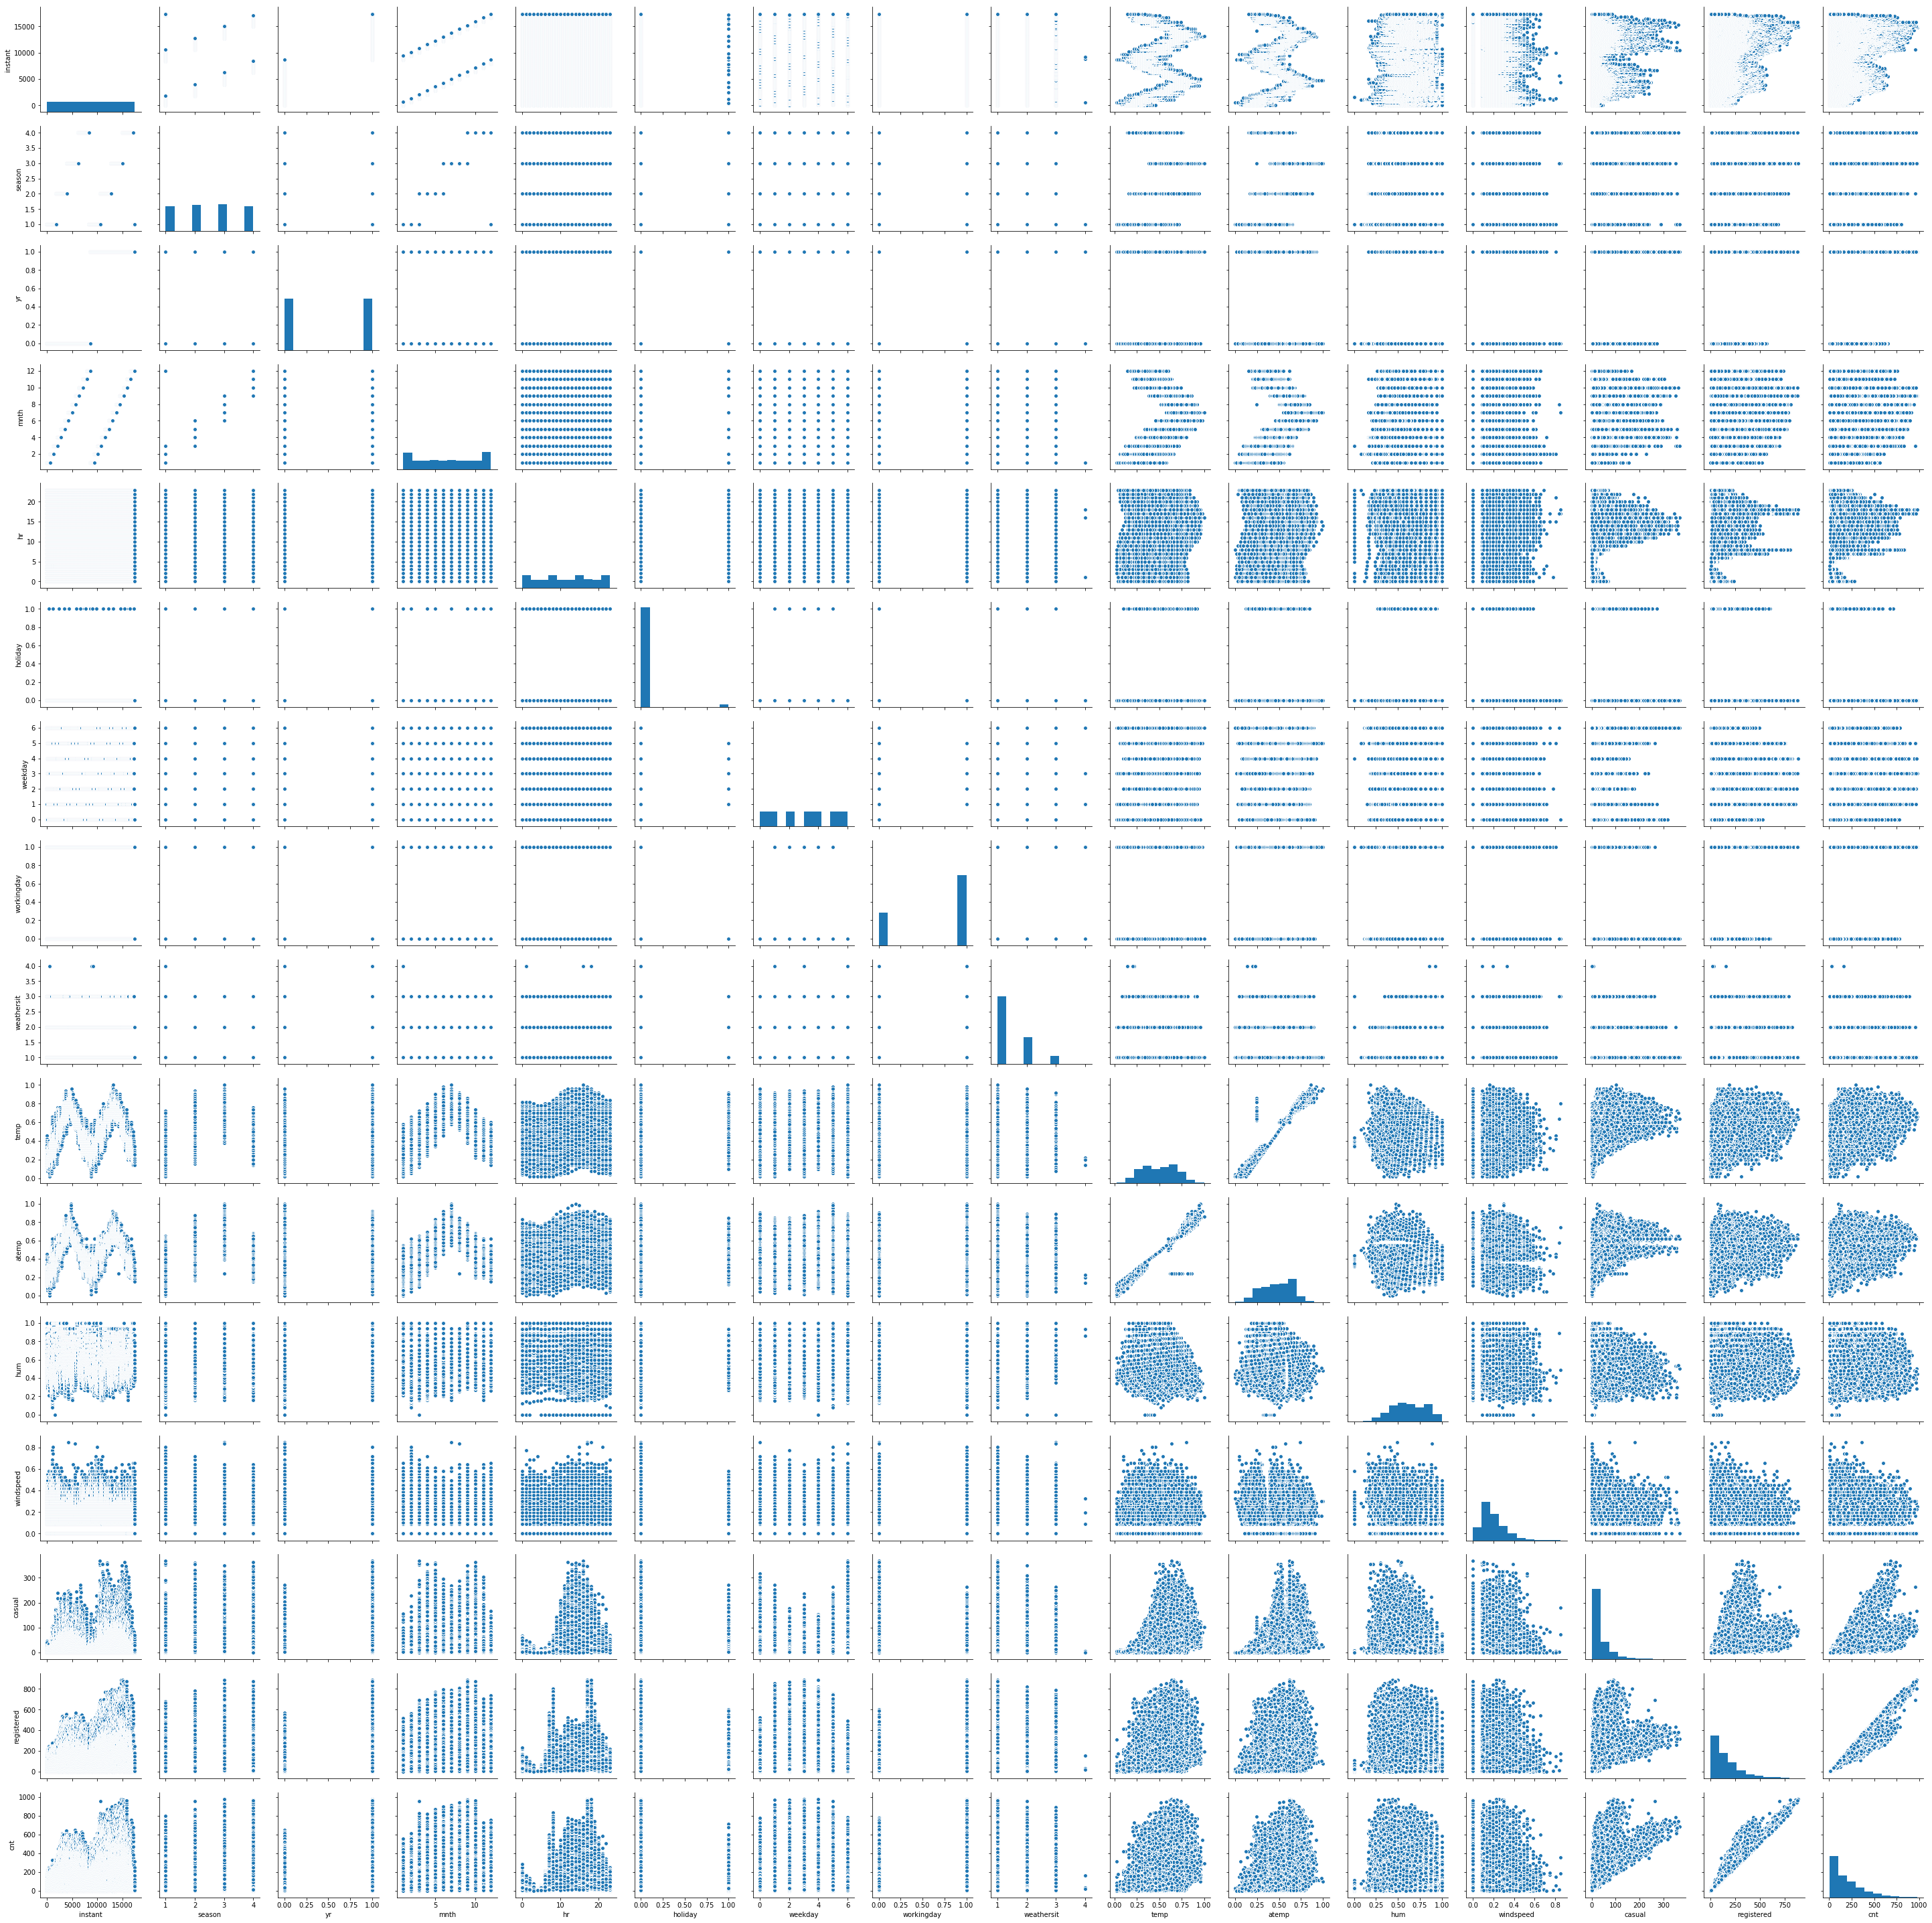

In [22]:
sns.pairplot(alldata)

In [50]:
feats = ['season','mnth','hr','holiday','weekday','workingday','weathersit','atemp','hum','windspeed']

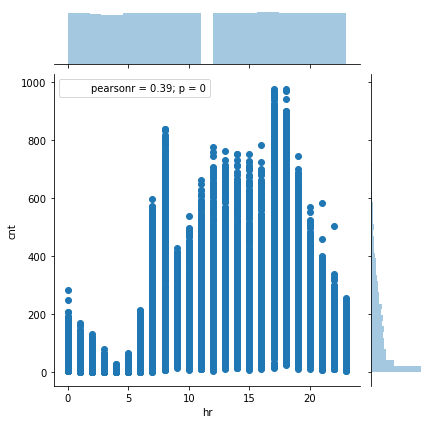

In [27]:
sns.jointplot('hr','cnt',data = alldata, kind = 'scatter')

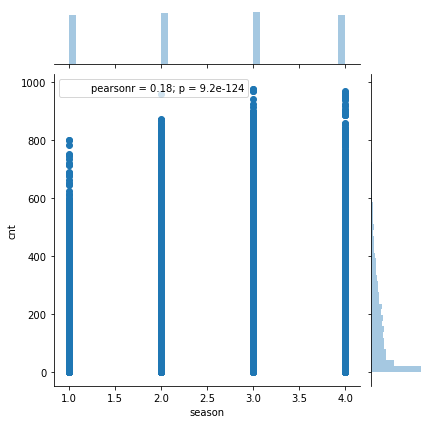

In [28]:
sns.jointplot('season','cnt',data = alldata)

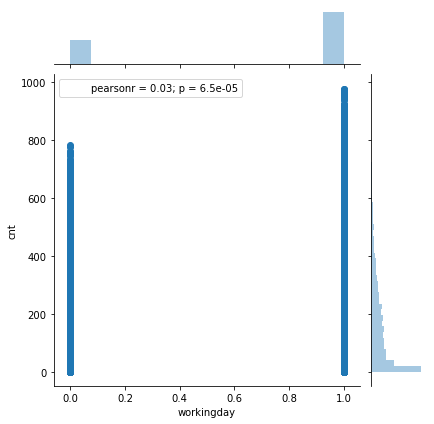

In [30]:
sns.jointplot('workingday','cnt',data=alldata)

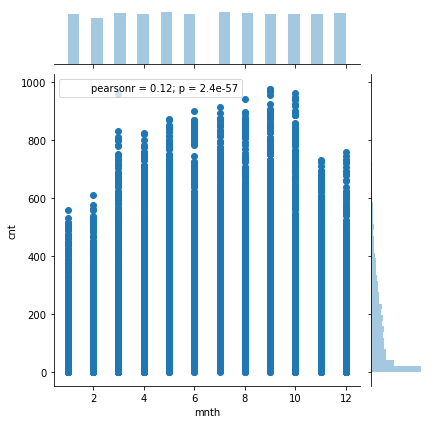

In [33]:
sns.jointplot('mnth','cnt',data=alldata)

In [51]:
feats

['season',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'atemp',
 'hum',
 'windspeed']

In [49]:
target = 'cnt'

In [70]:
#Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(alldata[feats],alldata[target])

In [53]:
lmodel = LinearRegression()

In [54]:
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
lmodel.coef_

array([  1.89616729e+01,   1.69830177e-01,   7.50591684e+00,
        -2.18672428e+01,   1.61878110e+00,   1.68513545e+00,
        -9.90334154e-01,   3.29698570e+02,  -2.14383632e+02,
         4.08706568e+01])

In [56]:
y_pred = lmodel.predict(X_test)

In [81]:
lmodel_score_train = lmodel.score(X_train,y_train)
lmodel_score_test = lmodel.score(X_test,y_test)

In [82]:
print(lmodel_score_train,lmodel_score_test)

0.338338065032 0.341408557628


In [57]:
y_pred

array([ 204.16524737,  162.21921109,  147.21453084, ...,  155.76695292,
        124.99751506,  196.65464805])

In [58]:
y_pred.shape

(4345,)

In [59]:
y_train.shape

(13034,)

In [60]:
alldata.shape

(17379, 17)

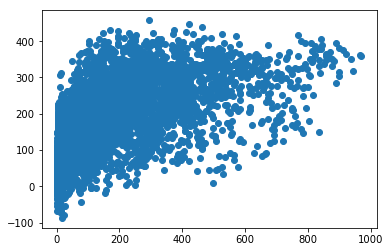

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
from sklearn import metrics

In [65]:
print("MAE :", metrics.mean_absolute_error(y_test,y_pred))
print("MSE :", metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)) )

MAE : 108.845301616
MSE : 22267.3196064
RMSE : 149.222383061


In [66]:
np.mean(alldata['cnt'])

189.46308763450142

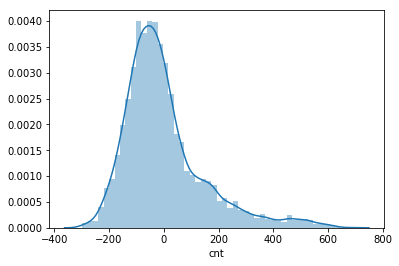

In [69]:
sns.distplot((y_test-y_pred))
#Check if the residuals are normally distributed (homoskedasticity)

In [71]:
#KNN Regression

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knnmodel = KNeighborsRegressor(5)

In [75]:
knnmodel.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [76]:
y_predknn = knnmodel.predict(X_test)

In [78]:
knn_score_train = knnmodel.score(X_train,y_train)
knn_score_test = knnmodel.score(X_test,y_test)

In [79]:
knn_score_test

0.81100345379341388

In [80]:
knn_score_train

0.87425321768977438

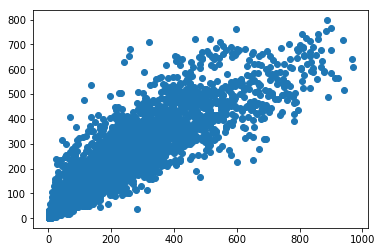

In [83]:
plt.scatter(y_test,y_predknn)

In [84]:
print("MAE :", metrics.mean_absolute_error(y_test,y_predknn))
print("MSE :", metrics.mean_squared_error(y_test,y_predknn))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predknn)) )

MAE : 52.008561565
MSE : 6390.07164097
RMSE : 79.9379236719


In [85]:
#Random Forest Regression

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor()

In [88]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [89]:
y_predrf = rf.predict(X_test)

In [90]:
y_predrf.shape

(4345,)

In [91]:
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)

In [92]:
print(rf_score_test,rf_score_train)

0.854310388275 0.972601884338


In [94]:
print("MAE : ",metrics.mean_absolute_error(y_test,y_predrf))
print("MSE : ",metrics.mean_squared_error(y_test,y_predrf))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test,y_predrf)))

MAE :  45.17371582
MSE :  4925.84163549
RMSE :  70.1843403865


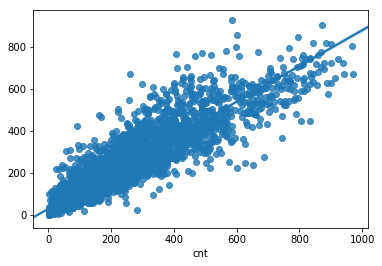

In [95]:
sns.regplot(y_test,y_predrf)

In [99]:
# RF model has the best performance out of the three